In [1]:
!python --version

Python 3.10.19


In [2]:
# Property Price Prediction - Complete EDA & Modeling Pipeline
# Satellite Imagery-Based Property Valuation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Advanced Models
try:
    import xgboost as xgb
    from xgboost import XGBRegressor
except:
    print("XGBoost not installed. Install with: pip install xgboost")

try:
    import lightgbm as lgb
    from lightgbm import LGBMRegressor
except:
    print("LightGBM not installed. Install with: pip install lightgbm")

try:
    from catboost import CatBoostRegressor
except:
    print("CatBoost not installed. Install with: pip install catboost")

In [3]:
# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("SATELLITE IMAGERY-BASED PROPERTY VALUATION")
print("Phase 1: Tabular Data Analysis & Modeling")
print("=" * 80)

SATELLITE IMAGERY-BASED PROPERTY VALUATION
Phase 1: Tabular Data Analysis & Modeling


### 1. DATA LOADING

In [6]:
# ============================================================================
# 1. DATA LOADING
# ============================================================================

print("\n[1] Loading Data...")

# Load train and test data
# Replace these paths with your actual file paths
# train_df = pd.read_excel('train(1).xlsx')
# test_df = pd.read_excel('test2.xlsx')

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

# Display first few rows
print("\nFirst 5 rows of training data:")
train_df.head()


[1] Loading Data...
Train shape: (16209, 21)
Test shape: (5404, 20)

First 5 rows of training data:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


### 2. EXPLORATORY DATA ANALYSIS (EDA)

#### 2.1 Basic Information

In [9]:
# ============================================================================
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "=" * 80)
print("[2] EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# 2.1 Basic Information
print("\n[2.1] Dataset Information")
print("\nTraining Data Info:")
train_df.info()


[2] EXPLORATORY DATA ANALYSIS

[2.1] Dataset Information

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        

In [10]:
print("\n\nBasic Statistics:")
train_df.describe()



Basic Statistics:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### 2.2 Missing Values Analysis

In [13]:
# 2.2 Missing Values Analysis
print("\n[2.2] Missing Values Analysis")
missing_train = train_df.isnull().sum()
missing_train_pct = 100 * missing_train / len(train_df)
missing_table = pd.DataFrame({
    'Missing_Count': missing_train,
    'Percentage': missing_train_pct
})
missing_table = missing_table[missing_table['Missing_Count'] > 0].sort_values('Percentage', ascending=False)
print("\nMissing Values in Training Data:")
print(missing_table)

# Visualize missing values
if len(missing_table) > 0:
    plt.figure(figsize=(10, 6))
    plt.bar(missing_table.index, missing_table['Percentage'])
    plt.xlabel('Features')
    plt.ylabel('Missing Percentage (%)')
    plt.title('Missing Values by Feature')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("NO MISSING VALUE")



[2.2] Missing Values Analysis

Missing Values in Training Data:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []
NO MISSING VALUE


#### 2.3 Target Variable Analysis


[2.3] Target Variable (Price) Analysis

Price Statistics:
count    1.620900e+04
mean     5.374703e+05
std      3.603036e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

Skewness: 4.0327
Kurtosis: 37.0942


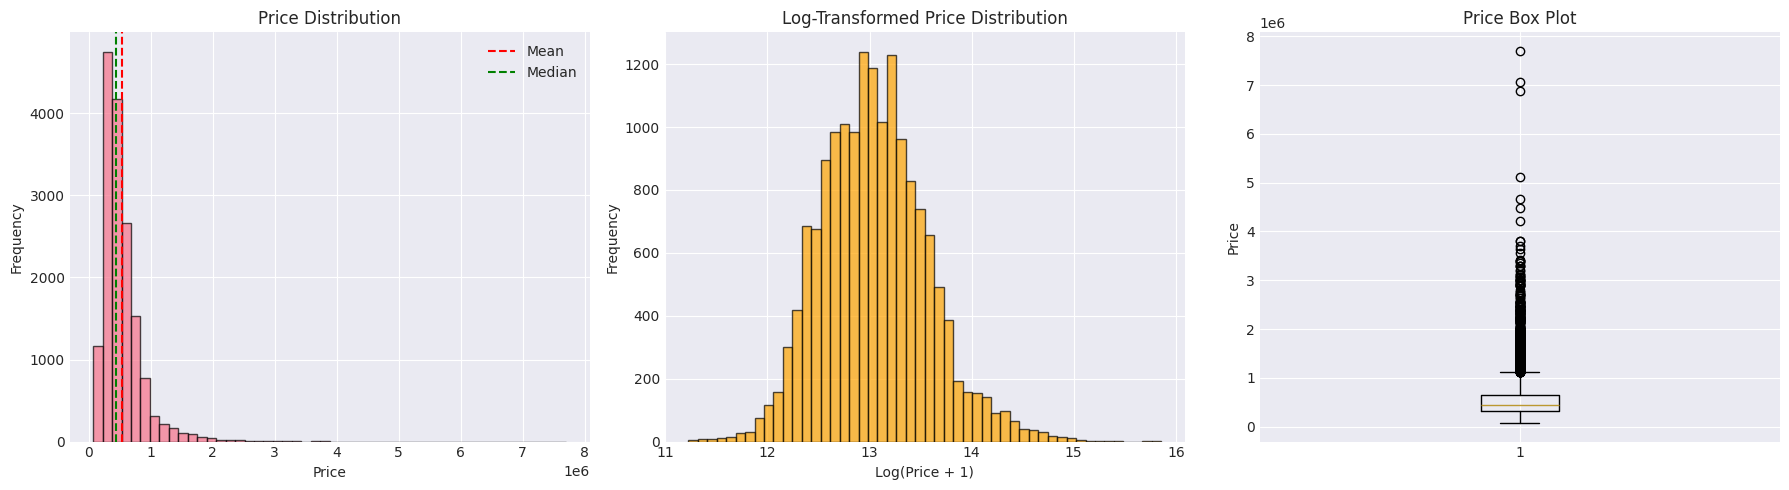

In [14]:
# 2.3 Target Variable Analysis
print("\n[2.3] Target Variable (Price) Analysis")
if 'price' in train_df.columns:
    print(f"\nPrice Statistics:")
    print(train_df['price'].describe())
    print(f"\nSkewness: {skew(train_df['price']):.4f}")
    print(f"Kurtosis: {kurtosis(train_df['price']):.4f}")
    
    # Price Distribution
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Histogram
    axes[0].hist(train_df['price'], bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Price')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Price Distribution')
    axes[0].axvline(train_df['price'].mean(), color='red', linestyle='--', label='Mean')
    axes[0].axvline(train_df['price'].median(), color='green', linestyle='--', label='Median')
    axes[0].legend()
    
    # Log-transformed Price
    axes[1].hist(np.log1p(train_df['price']), bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[1].set_xlabel('Log(Price + 1)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Log-Transformed Price Distribution')
    
    # Box Plot
    axes[2].boxplot(train_df['price'])
    axes[2].set_ylabel('Price')
    axes[2].set_title('Price Box Plot')
    
    plt.tight_layout()
    plt.show()


#### 2.4 Numerical Features Analysis


[2.4] Numerical Features Analysis

Numerical Features: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


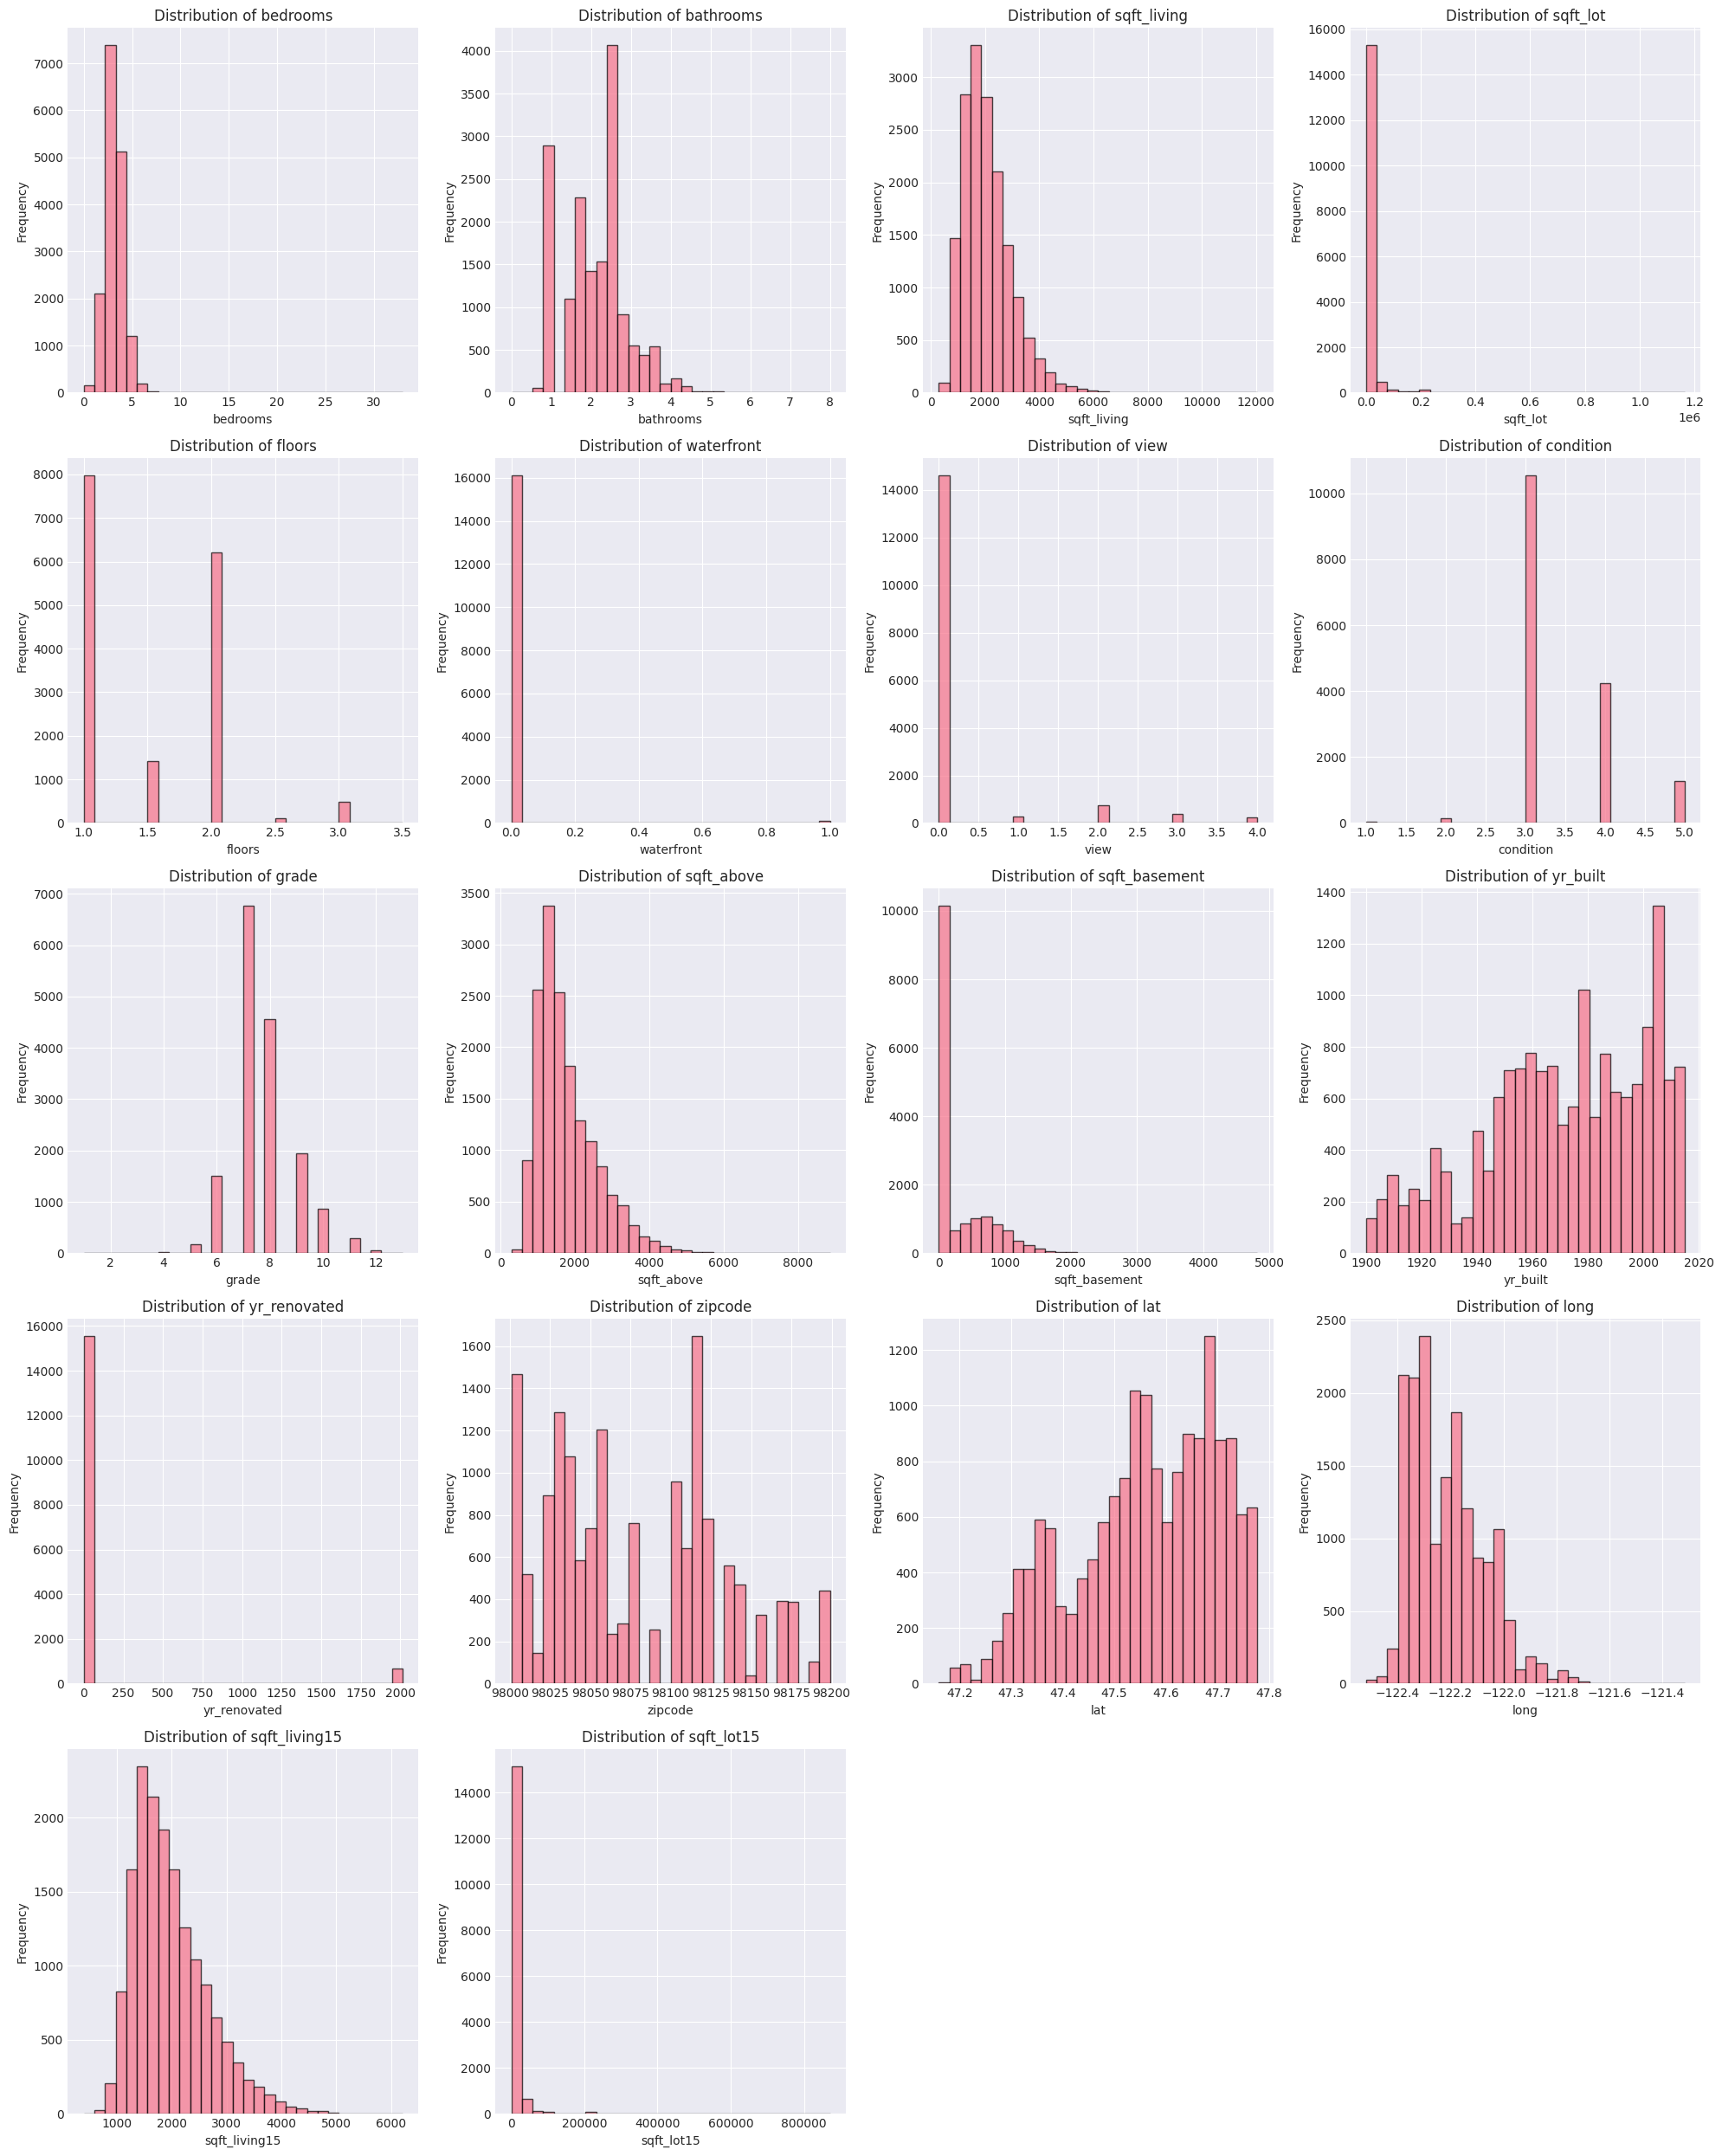

In [15]:
# 2.4 Numerical Features Analysis
print("\n[2.4] Numerical Features Analysis")

# Identify numerical columns
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
if 'price' in numerical_cols:
    numerical_cols.remove('price')
if 'id' in numerical_cols:
    numerical_cols.remove('id')

print(f"\nNumerical Features: {numerical_cols}")

# Distribution of numerical features
n_features = len(numerical_cols)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(train_df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'Distribution of {col}')

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


#### 2.5 Correlation Analysis


[2.5] Correlation Analysis


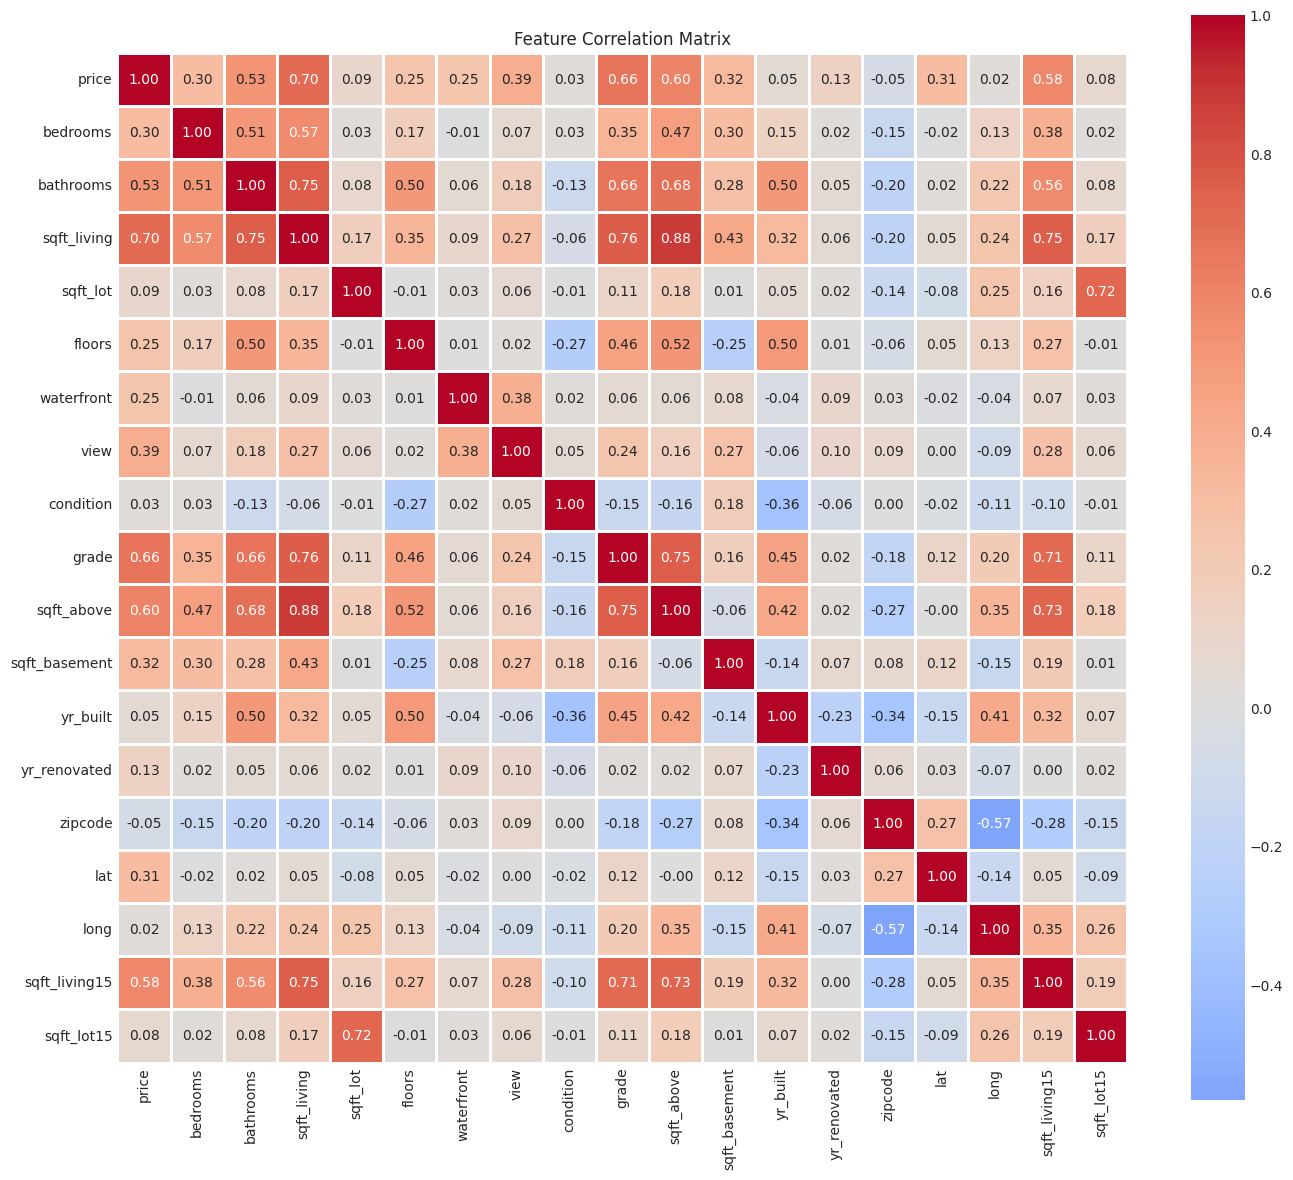

In [17]:
# 2.5 Correlation Analysis
print("\n[2.5] Correlation Analysis")

correlation_cols = ['price'] + numerical_cols if 'price' in train_df.columns else numerical_cols
correlation_matrix = train_df[correlation_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


Top 10 Features Correlated with Price:
price            1.000000
sqft_living      0.700933
grade            0.664266
sqft_above       0.602648
sqft_living15    0.581781
bathrooms        0.525487
view             0.390534
sqft_basement    0.320301
lat              0.310008
bedrooms         0.304454
floors           0.251428
Name: price, dtype: float64


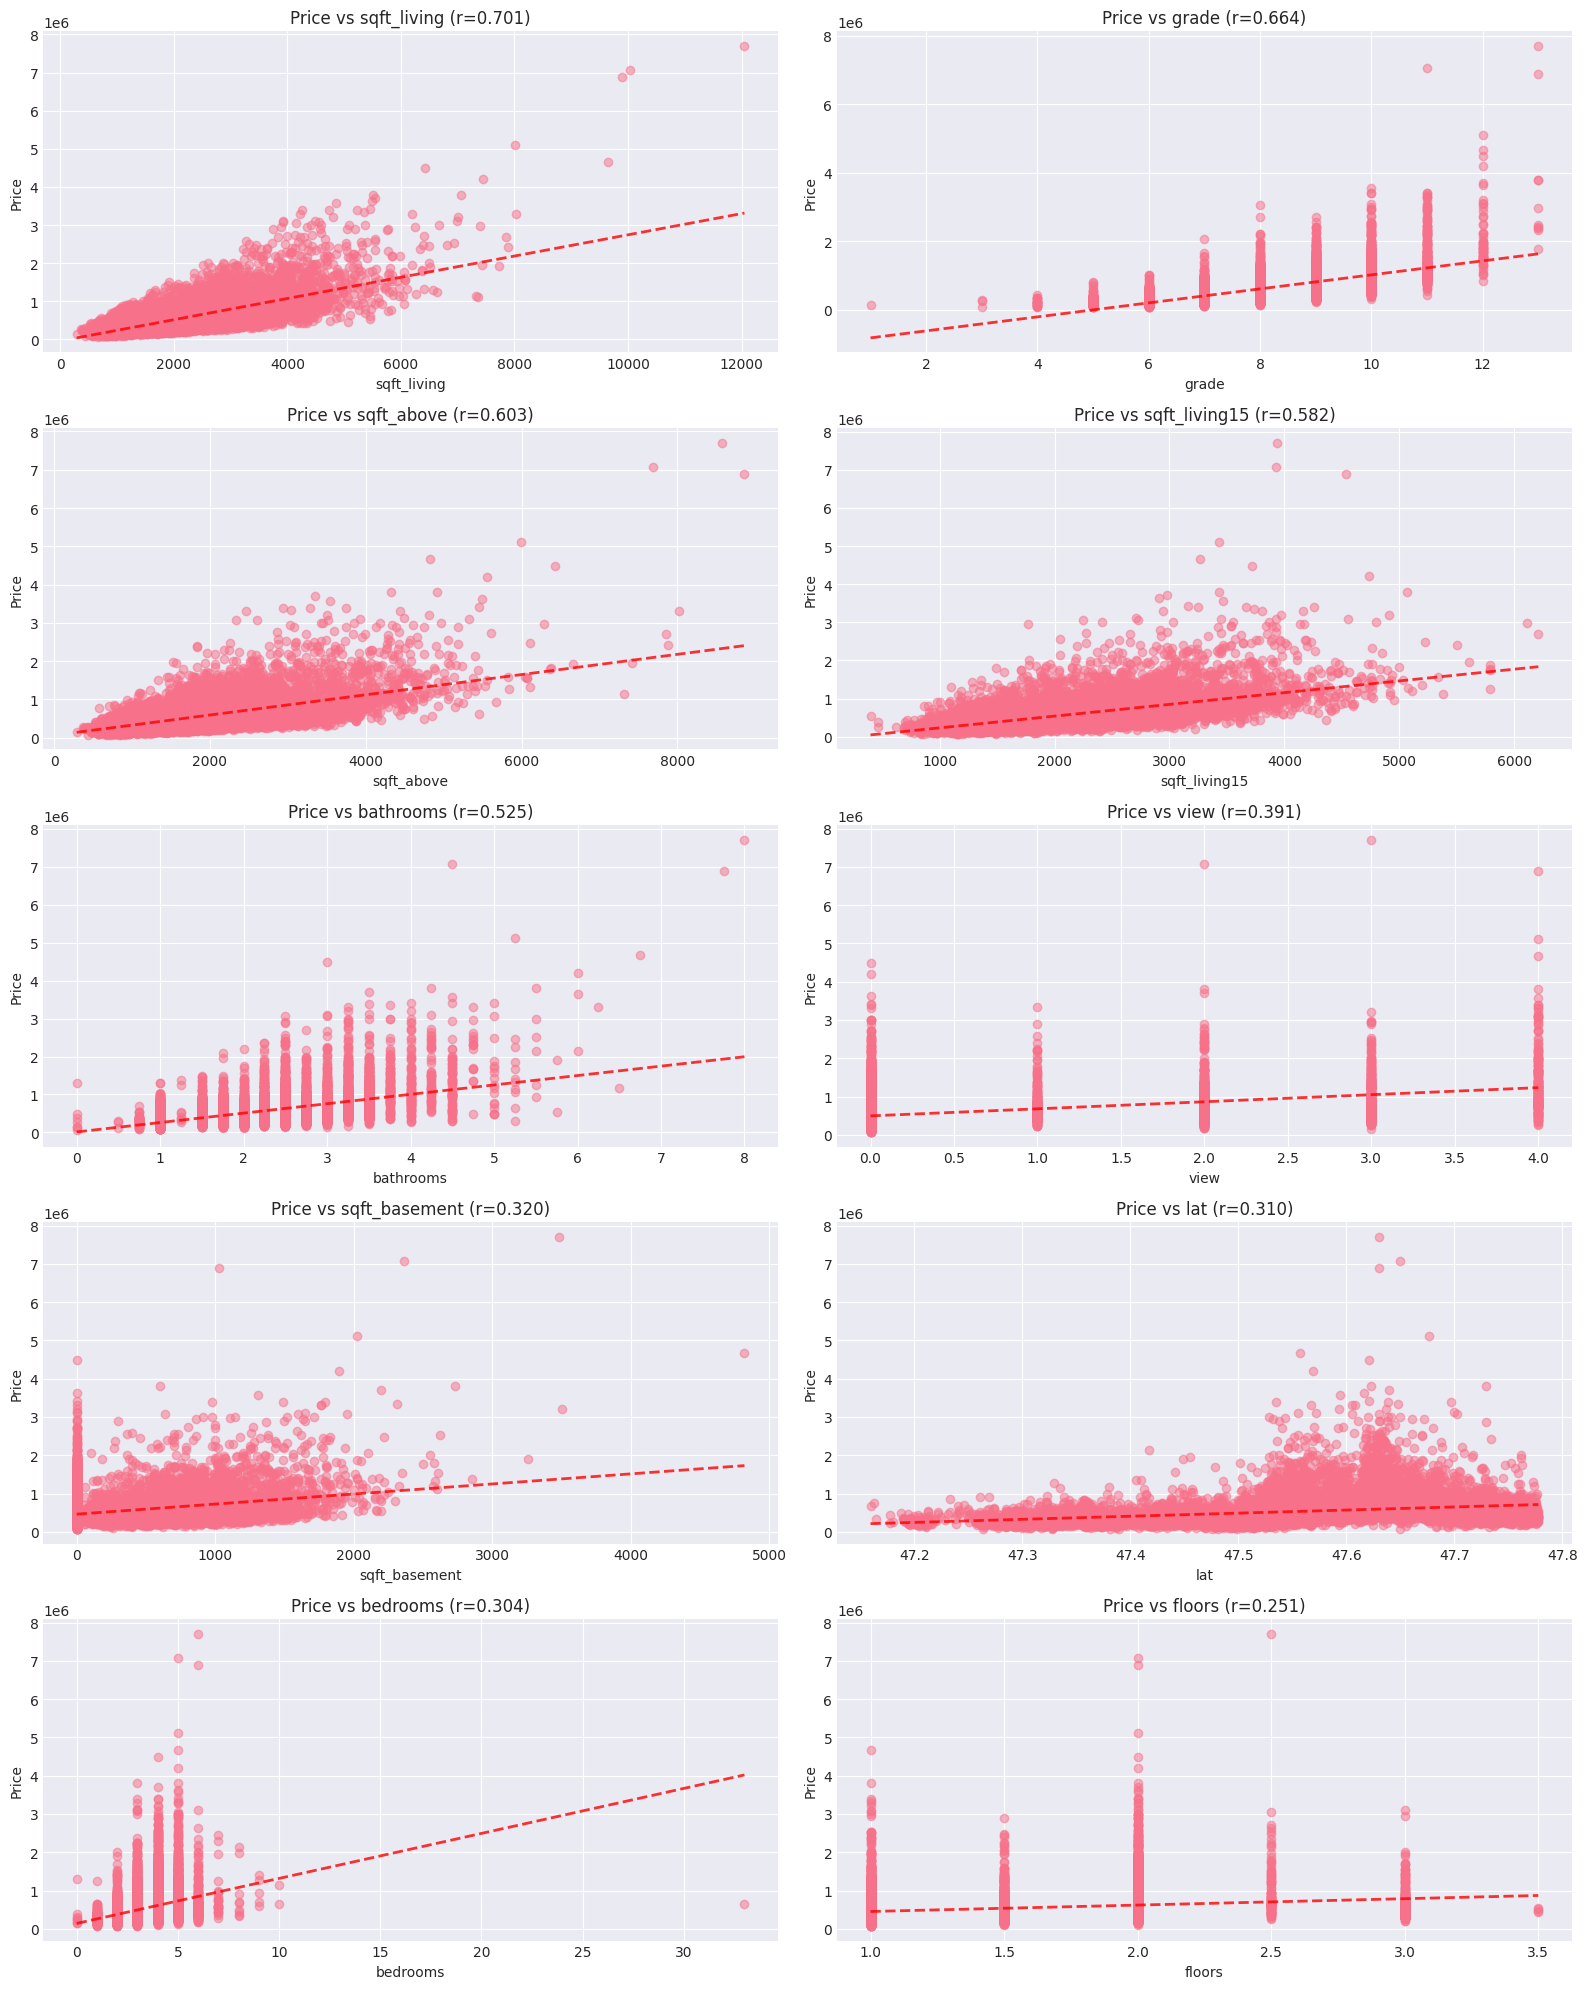

In [18]:
# Top correlations with price
if 'price' in train_df.columns:
    price_corr = correlation_matrix['price'].sort_values(ascending=False)
    print("\nTop 10 Features Correlated with Price:")
    print(price_corr.head(11))  # 11 to include price itself
    
    # Visualize top correlations
    top_features = price_corr.head(11).index.tolist()
    top_features.remove('price')
    
    n_top = len(top_features)
    fig, axes = plt.subplots((n_top + 1) // 2, 2, figsize=(16, 4*((n_top + 1) // 2)))
    axes = axes.flatten()
    
    for idx, feature in enumerate(top_features):
        axes[idx].scatter(train_df[feature], train_df['price'], alpha=0.5)
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Price')
        axes[idx].set_title(f'Price vs {feature} (r={price_corr[feature]:.3f})')
        
        # Add trend line
        z = np.polyfit(train_df[feature].dropna(), 
                       train_df.loc[train_df[feature].notna(), 'price'], 1)
        p = np.poly1d(z)
        axes[idx].plot(train_df[feature].sort_values(), 
                      p(train_df[feature].sort_values()), 
                      "r--", alpha=0.8, linewidth=2)
    
    # Hide unused subplot
    if n_top % 2 != 0:
        axes[-1].axis('off')
    
    plt.tight_layout()
    plt.show()


#### 2.6 Categorical Features Analysis

In [19]:
# 2.6 Categorical Features Analysis
print("\n[2.6] Categorical Features Analysis")

categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
if 'id' in categorical_cols:
    categorical_cols.remove('id')

print(f"\nCategorical Features: {categorical_cols}")

for col in categorical_cols:
    print(f"\n{col} - Unique Values: {train_df[col].nunique()}")
    print(train_df[col].value_counts().head(10))



[2.6] Categorical Features Analysis

Categorical Features: ['date']

date - Unique Values: 366
date
20140623T000000    115
20140625T000000     99
20150325T000000     94
20140626T000000     93
20150421T000000     93
20150428T000000     92
20140709T000000     91
20150414T000000     91
20140826T000000     90
20140520T000000     90
Name: count, dtype: int64


#### 2.7 Geospatial Analysis


[2.7] Geospatial Analysis


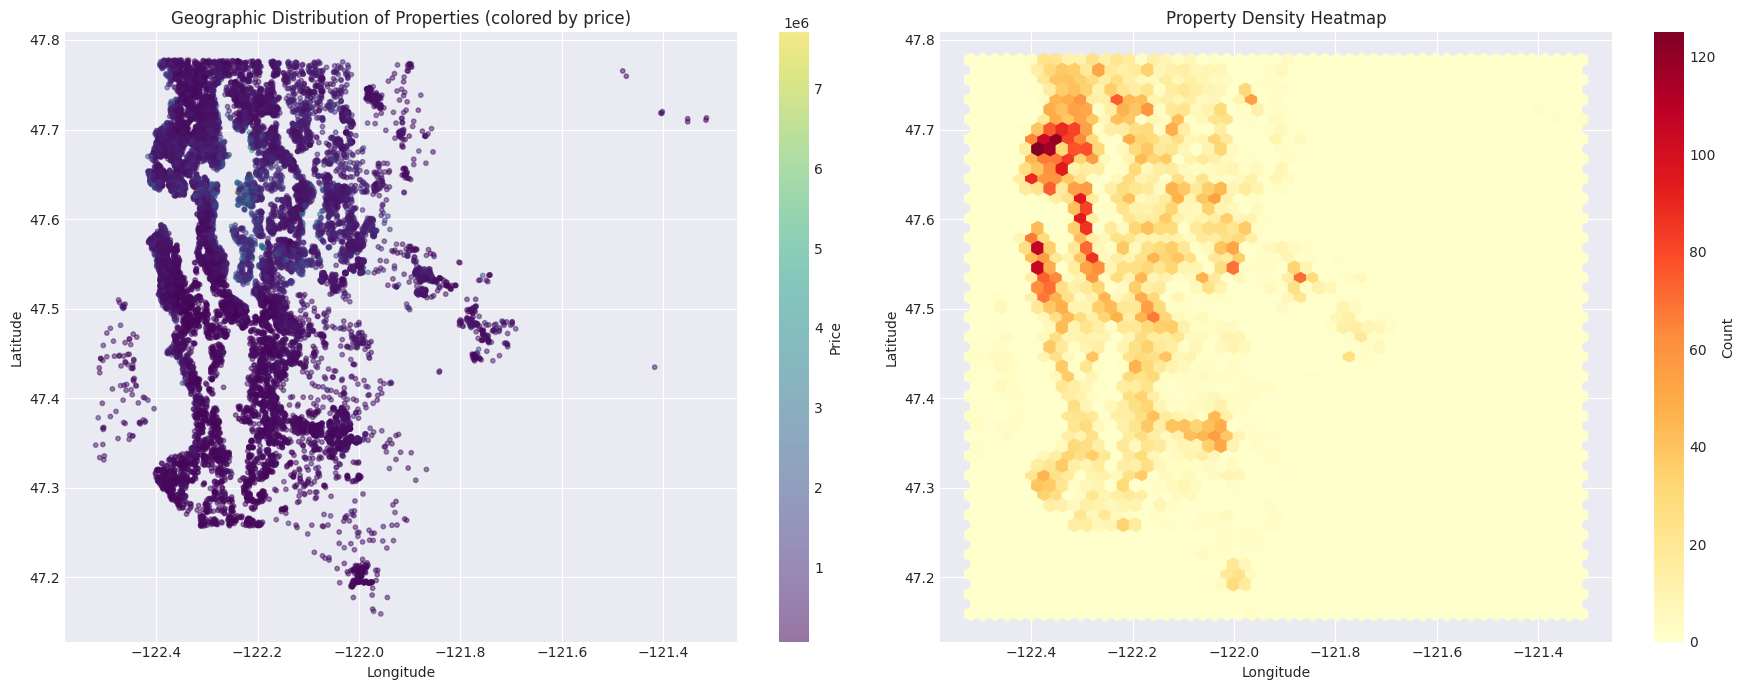

In [20]:
# 2.7 Geospatial Analysis
print("\n[2.7] Geospatial Analysis")

if 'lat' in train_df.columns and 'long' in train_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # Geographic distribution
    scatter = axes[0].scatter(train_df['long'], train_df['lat'], 
                             c=train_df['price'], cmap='viridis', 
                             alpha=0.5, s=10)
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].set_title('Geographic Distribution of Properties (colored by price)')
    plt.colorbar(scatter, ax=axes[0], label='Price')
    
    # Density plot
    axes[1].hexbin(train_df['long'], train_df['lat'], gridsize=50, cmap='YlOrRd')
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')
    axes[1].set_title('Property Density Heatmap')
    plt.colorbar(axes[1].collections[0], ax=axes[1], label='Count')
    
    plt.tight_layout()
    plt.show()


#### 2.8 Feature Relationships


[2.8] Key Feature Relationships

Verifying: sqft_living = sqft_above + sqft_basement
Matches: 16209 / 16209


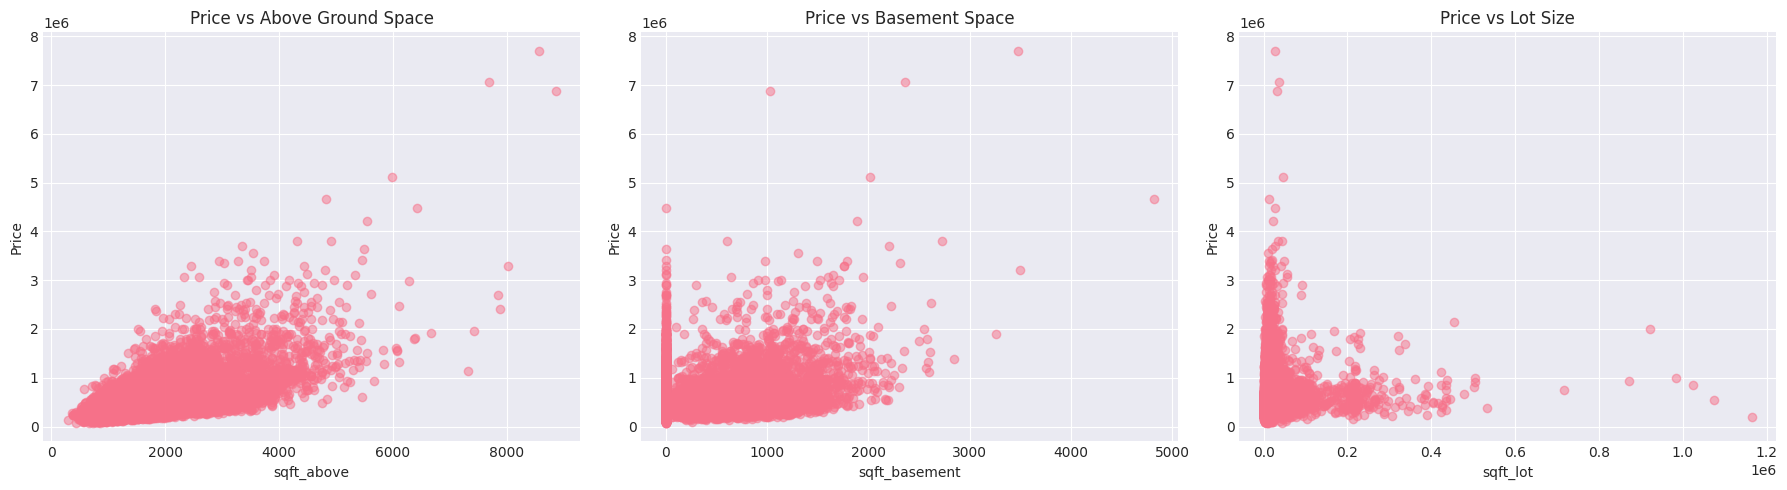

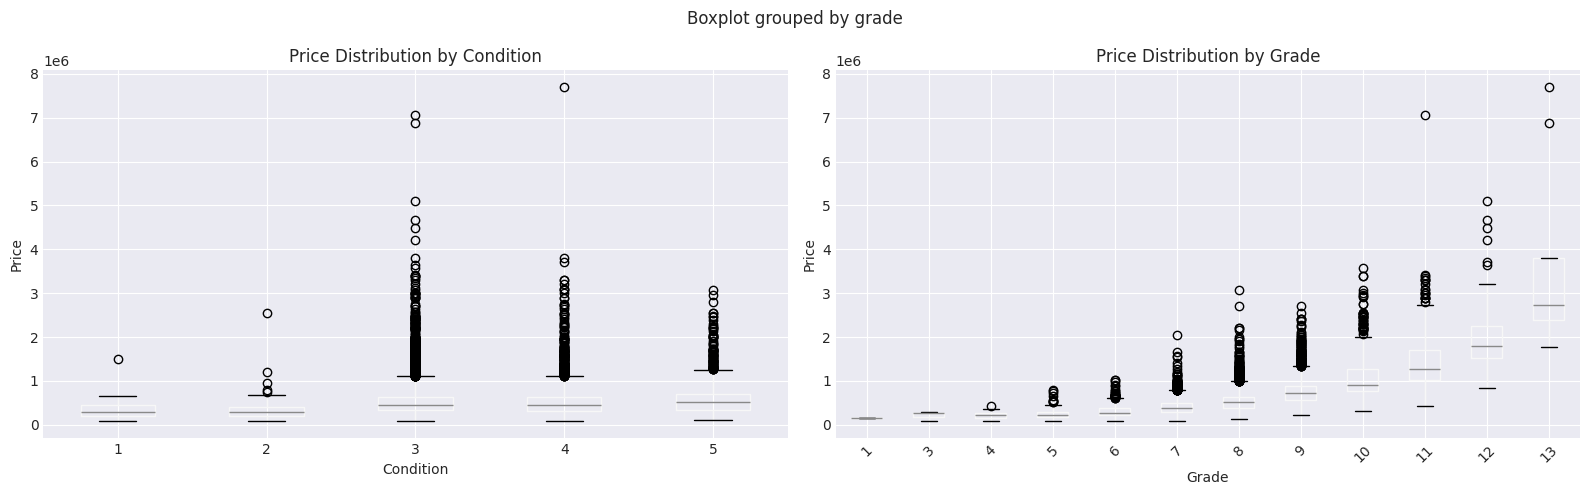

In [21]:
# 2.8 Feature Relationships
print("\n[2.8] Key Feature Relationships")

# sqft_living components
if all(col in train_df.columns for col in ['sqft_living', 'sqft_above', 'sqft_basement']):
    print("\nVerifying: sqft_living = sqft_above + sqft_basement")
    train_df['sqft_check'] = train_df['sqft_above'] + train_df['sqft_basement']
    print(f"Matches: {(train_df['sqft_living'] == train_df['sqft_check']).sum()} / {len(train_df)}")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    axes[0].scatter(train_df['sqft_above'], train_df['price'], alpha=0.5)
    axes[0].set_xlabel('sqft_above')
    axes[0].set_ylabel('Price')
    axes[0].set_title('Price vs Above Ground Space')
    
    axes[1].scatter(train_df['sqft_basement'], train_df['price'], alpha=0.5)
    axes[1].set_xlabel('sqft_basement')
    axes[1].set_ylabel('Price')
    axes[1].set_title('Price vs Basement Space')
    
    axes[2].scatter(train_df['sqft_lot'], train_df['price'], alpha=0.5)
    axes[2].set_xlabel('sqft_lot')
    axes[2].set_ylabel('Price')
    axes[2].set_title('Price vs Lot Size')
    
    plt.tight_layout()
    plt.show()

# Condition and Grade Analysis
if 'condition' in train_df.columns and 'price' in train_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    train_df.boxplot(column='price', by='condition', ax=axes[0])
    axes[0].set_xlabel('Condition')
    axes[0].set_ylabel('Price')
    axes[0].set_title('Price Distribution by Condition')
    plt.sca(axes[0])
    plt.xticks(rotation=0)
    
    if 'grade' in train_df.columns:
        train_df.boxplot(column='price', by='grade', ax=axes[1])
        axes[1].set_xlabel('Grade')
        axes[1].set_ylabel('Price')
        axes[1].set_title('Price Distribution by Grade')
        plt.sca(axes[1])
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

### 3. FEATURE ENGINEERING

In [33]:
# ============================================================================
# 3. FEATURE ENGINEERING
# ============================================================================

print("\n" + "=" * 80)
print("[3] FEATURE ENGINEERING")
print("=" * 80)

def engineer_features(df, is_train=True):
    """
    Create new features from existing ones
    """
    df = df.copy()
    
    # 3.1 Basic Features
    print("\n[3.1] Creating Basic Engineered Features...")
    
    # Price per sqft (only for training data)
    if is_train and 'price' in df.columns and 'sqft_living' in df.columns:
        df['price_per_sqft'] = df['price'] / (df['sqft_living'] + 1)
    
    # Total rooms
    if 'bedrooms' in df.columns and 'bathrooms' in df.columns:
        df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    
    # Living space ratio
    if 'sqft_living' in df.columns and 'sqft_lot' in df.columns:
        df['living_lot_ratio'] = df['sqft_living'] / (df['sqft_lot'] + 1)
    
    # Basement flag
    if 'sqft_basement' in df.columns:
        df['has_basement'] = (df['sqft_basement'] > 0).astype(int)
    
    # Above ground ratio
    if 'sqft_above' in df.columns and 'sqft_living' in df.columns:
        df['above_ratio'] = df['sqft_above'] / (df['sqft_living'] + 1)
    
    # 3.2 Neighborhood Features
    print("[3.2] Creating Neighborhood Features...")
    
    if 'sqft_living15' in df.columns and 'sqft_living' in df.columns:
        df['living_vs_neighbors'] = df['sqft_living'] / (df['sqft_living15'] + 1)
    
    if 'sqft_lot15' in df.columns and 'sqft_lot' in df.columns:
        df['lot_vs_neighbors'] = df['sqft_lot'] / (df['sqft_lot15'] + 1)
    
    # 3.3 Quality Features
    print("[3.3] Creating Quality Features...")
    
    if 'grade' in df.columns and 'condition' in df.columns:
        df['quality_score'] = df['grade'] * df['condition']
    
    # 3.4 Age-related Features (if date columns exist)
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df['year_sold'] = df['date'].dt.year
        df['month_sold'] = df['date'].dt.month
        df['quarter_sold'] = df['date'].dt.quarter
        
        if 'yr_built' in df.columns:
            df['age_at_sale'] = df['year_sold'] - df['yr_built']
            df['age_at_sale'] = df['age_at_sale'].clip(lower=0)
    
    # Age of property
    if 'yr_built' in df.columns:
        current_year = 2026
        df['property_age'] = current_year - df['yr_built']
        df['property_age'] = df['property_age'].clip(lower=0)
    
    # Renovation flag and age
    if 'yr_renovated' in df.columns:
        df['was_renovated'] = (df['yr_renovated'] > 0).astype(int)
        if 'yr_built' in df.columns:
            df['years_since_renovation'] = current_year - df['yr_renovated']
            df.loc[df['yr_renovated'] == 0, 'years_since_renovation'] = df['property_age']
    
    # 3.5 Location Features
    print("[3.4] Creating Location Features...")
    
    if 'lat' in df.columns and 'long' in df.columns:
        # Distance from city center (approximate - Seattle)
        city_center_lat = 47.6062
        city_center_long = -122.3321
        
        df['dist_from_center'] = np.sqrt(
            (df['lat'] - city_center_lat)**2 + 
            (df['long'] - city_center_long)**2
        )
    
    # 3.6 Interaction Features
    print("[3.5] Creating Interaction Features...")
    
    if 'bedrooms' in df.columns and 'sqft_living' in df.columns:
        df['sqft_per_bedroom'] = df['sqft_living'] / (df['bedrooms'] + 1)
    
    if 'bathrooms' in df.columns and 'sqft_living' in df.columns:
        df['sqft_per_bathroom'] = df['sqft_living'] / (df['bathrooms'] + 1)
    
    # Luxury indicator
    if 'grade' in df.columns and 'sqft_living' in df.columns:
        df['luxury_score'] = df['grade'] * np.log1p(df['sqft_living'])
    
    # View quality
    if 'view' in df.columns and 'waterfront' in df.columns:
        df['premium_view'] = df['view'] * (df['waterfront'] + 1)
    
    print(f"Feature engineering complete. New shape: {df.shape}")
    
    return df

# Apply feature engineering
train_engineered = engineer_features(train_df, is_train=True)
test_engineered = engineer_features(test_df, is_train=False)

train_engineered.to_csv("train_engineered.csv")
test_engineered.to_csv("test_engineered.csv")

print(f"\nNew features created: {train_engineered.shape[1] - train_df.shape[1]}")



[3] FEATURE ENGINEERING

[3.1] Creating Basic Engineered Features...
[3.2] Creating Neighborhood Features...
[3.3] Creating Quality Features...
[3.4] Creating Location Features...
[3.5] Creating Interaction Features...
Feature engineering complete. New shape: (16209, 42)

[3.1] Creating Basic Engineered Features...
[3.2] Creating Neighborhood Features...
[3.3] Creating Quality Features...
[3.4] Creating Location Features...
[3.5] Creating Interaction Features...
Feature engineering complete. New shape: (5404, 39)

New features created: 20


### 4. DATA PREPROCESSING

#### 4.1 Handle Missing Values

In [24]:
# ============================================================================
# 4. DATA PREPROCESSING
# ============================================================================

print("\n" + "=" * 80)
print("[4] DATA PREPROCESSING")
print("=" * 80)

# 4.1 Handle Missing Values
print("\n[4.1] Handling Missing Values...")

# For numerical columns, fill with median
numerical_cols = train_engineered.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID and target from preprocessing
cols_to_exclude = ['id', 'price']
numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]

for col in numerical_cols:
    if train_engineered[col].isnull().sum() > 0:
        median_val = train_engineered[col].median()
        train_engineered[col].fillna(median_val, inplace=True)
        test_engineered[col].fillna(median_val, inplace=True)
print("done")


[4] DATA PREPROCESSING

[4.1] Handling Missing Values...
done


#### 4.2 Handle Outliers

In [25]:
# 4.2 Handle Outliers
print("\n[4.2] Outlier Detection...")

# Detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    return outliers, lower_bound, upper_bound

outlier_summary = []
for col in ['price', 'sqft_living', 'sqft_lot']:
    if col in train_engineered.columns:
        outliers, lower, upper = detect_outliers_iqr(train_engineered, col)
        outlier_summary.append({
            'Feature': col,
            'Outliers': outliers,
            'Percentage': f"{100 * outliers / len(train_engineered):.2f}%"
        })

outlier_df = pd.DataFrame(outlier_summary)
print("\nOutlier Summary:")
print(outlier_df)



[4.2] Outlier Detection...

Outlier Summary:
       Feature  Outliers Percentage
0        price       310      1.91%
1  sqft_living        47      0.29%
2     sqft_lot      1338      8.25%


#### 4.3 Prepare features and target

In [32]:
# 4.3 Prepare features and target
print("\n[4.3] Preparing Features and Target...")

# Separate features and target
X = train_engineered.drop(['price', 'id'], axis=1, errors='ignore')
y = train_engineered['price']
X_test = test_engineered.drop(['id'], axis=1, errors='ignore')

# Identify date columns to exclude
date_cols = X.select_dtypes(include=['datetime64']).columns.tolist()
X = X.drop(date_cols, axis=1, errors='ignore')
X_test = X_test.drop(date_cols, axis=1, errors='ignore')

# Ensure same columns in train and test
common_cols = list(set(X.columns) & set(X_test.columns))
X = X[common_cols]
X_test = X_test[common_cols]

X.to_csv("X.csv")
print("X.csv saved!!")
y.to_csv("y.csv")
print("y.csv saved!!")
X_test.to_csv("X_test.csv")
print("X_test.csv saved!!")

print(f"Final feature matrix shape: {X.shape}")
print(f"Test feature matrix shape: {X_test.shape}")

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")


[4.3] Preparing Features and Target...
X.csv saved!!
y.csv saved!!
X_test.csv saved!!
Final feature matrix shape: (16209, 37)
Test feature matrix shape: (5404, 37)
X_train: (12967, 37)
X_val: (3242, 37)
y_train: (12967,)
y_val: (3242,)


#### 4.4 Feature Scaling

In [ ]:
# 4.4 Feature Scaling
print("\n[4.4] Feature Scaling...")

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaling complete.")




[4.4] Feature Scaling...
Scaling complete.


Index(['month_sold', 'property_age', 'floors', 'sqft_living', 'zipcode',
       'yr_built', 'lat', 'sqft_living15', 'lot_vs_neighbors', 'sqft_lot',
       'bathrooms', 'sqft_lot15', 'age_at_sale', 'dist_from_center',
       'was_renovated', 'years_since_renovation', 'living_lot_ratio',
       'sqft_per_bathroom', 'waterfront', 'sqft_above', 'long', 'view',
       'condition', 'above_ratio', 'bedrooms', 'living_vs_neighbors',
       'year_sold', 'has_basement', 'quality_score', 'yr_renovated', 'grade',
       'total_rooms', 'premium_view', 'quarter_sold', 'sqft_per_bedroom',
       'luxury_score', 'sqft_basement'],
      dtype='object')